#Section 17.4: Lagrange Polynomial Interpolation

Rather than finding cubic polynomials between subsequent pairs of data points, Lagrange polynomial interpolation finds a single polynomial that goes through all the data points. This polynomial is referred to as a Lagrange polynomial, $L(x)$, and as an interpolation function, it should have the property $L(x_i)=y_i$ for every point in the data set. For computing Lagrange polynomials, it is useful to write them as a linear combination of Lagrange basis polynomials, $P_i(x)$, where $P_i(x) = \prod_{j=1, j\neq i}^{n} \frac{x - x_j}{x_i - x_j}$ and $L(x) = \sum_{i=1}^{n}y_i P_i(x)$.


**Example**: Find the Lagrange basis polynomials for the data set $x = [1, 2, 5]$ and $y = [3, 1, 2]$. 

##Use the formula

$P_1(x) = \frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}= \frac{(x-2)(x-5)}{(1-2)(1-5)}= \frac{x^2-5x-2x+10}{4}=\frac{x^2-7x+10}{4}=\frac{1}{4}x^2 - \frac{7}{4}x+\frac{10}{4}$


$P_2(x) = \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}= \frac{(x-1)(x-5)}{(2-1)(2-5)}=\frac{x^2-6x+5}{-3}=-\frac{1}{3}x^2 +2x-\frac{5}{3}$


$P_3(x) = \frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}=\frac{(x-1)(x-2)}{(5-1)(5-2)} = \frac{x^2-3x+2}{12}=\frac{1}{12}x^2 - \frac{1}{4}x+\frac{1}{6}$


In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

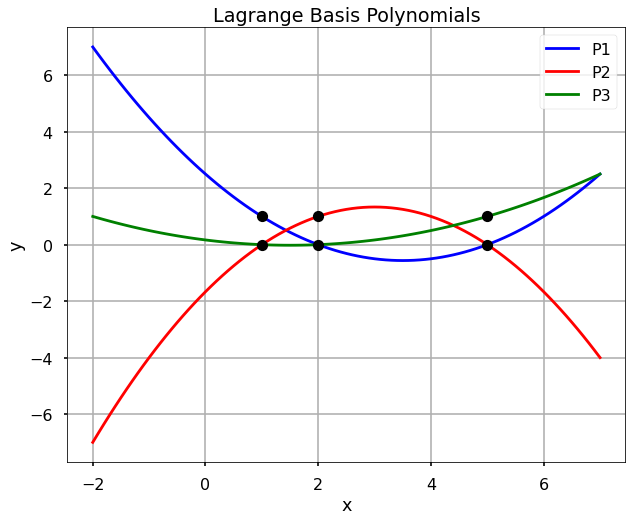

In [11]:
x = [1, 2, 5]
y = [3, 1, 2]
P1_coeff = [10/4,-7/4,1/4]
P2_coeff = [-5/3, 2,-1/3]
P3_coeff = [1/6,-1/4,1/12]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-2.0, 7.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

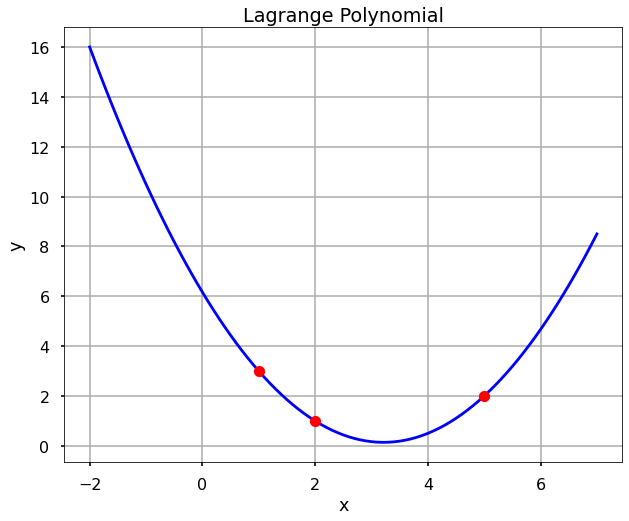

In [14]:
L = 3*P1 + P2 + 2*P3
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**WARNING!** Lagrange interpolation polynomials are defined outside the area of interpolation, that is outside of the interval $[x_1,x_n]$, will grow very fast and unbounded outside this region. This is not a desirable feature because in general, this is not the behavior of the underlying data. Thus, a Lagrange interpolation should never be used to interpolate outside this region.

##Use lagrange from scipy

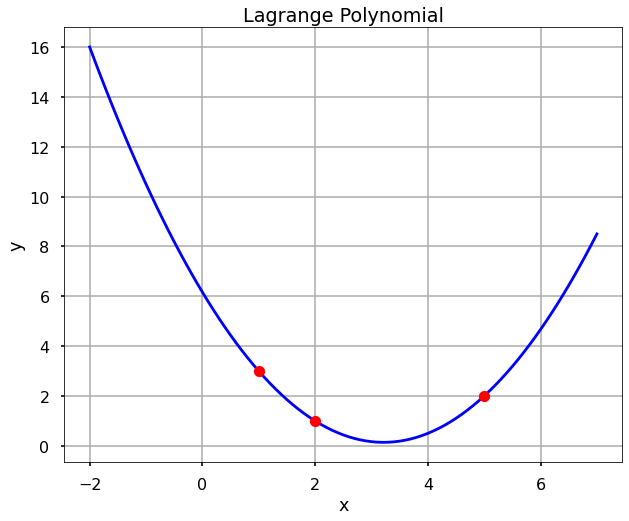

In [13]:
from scipy.interpolate import lagrange
f = lagrange(x, y)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Section 17.5: Newton’s Polynomial Interpolation

Newton’s polynomial interpolation is another popular way to fit exactly for a set of data points. The general form of the an $n−1$ order Newton’s polynomial that goes through $n$ points is:

$f(x)=a_0+a_1(x−x_0)+a_2(x−x_0)(x−x_1)+⋯+a_n(x−x_0)(x−x_1)…(x−x_n)$
which can be re-written as: 

$f(x)=\sum_{i=0}^{n}a_in_i(x)$

where $n_i(x)=\prod_{j=0}^{i-1}(x-x_j)$.

The special feature of the Newton’s polynomial is that the coefficients ai can be determined using a very simple mathematical procedure. For example, since the polynomial goes through each data points, therefore, for a data points $(x_i,y_i)$, we will have $f(x_i)=y_i=f[x_i]$. We call these divided differences, if we define:


$f[x_0]$is called a zero-order divided difference.

$f[x_0, x_1]$is called a $1^s$$^t$-order divided difference.

$f[x_0, x_1, x_2]$is called a $2^n$$^d$-order divided difference.

$f[x_0,...,x_k]$is called a $k^t$$^h$-order divided difference.

$f[x_k,x_k$$_−$$_1,…,x_1,x_0]=$ 
$\frac{f[x_k,x_k{_-}{_1},…,x_2,x_1]−f[x_k{_−}{_1},x_k{_−}{_2},…,x_1,x_0]}{x_k-x_0}$

Let’s see an example using 5 data point.

Each element in the table can be calculated using the two previous elements (to the left). In reality, we can calculate each element and store them into a diagonal matrix, that is the coefficients matrix can be write as:
\begin{matrix}
y_0 & f[x_1,x_0] & f[x_2,x_1,x_0] & f[x_3,x_2,x_1,x_0] & f[x_4,x_3,x_2,x_1,x_0]\\
y_1 & f[x_2,x_1] & f[x_3,x_2,x_1] & f[x_4,x_3,x_2,x_2] & 0\\
y_2 & f[x_3,x_2] & f[x_4,x_3,x_2] & 0                  & 0\\
y_3 & f[x_4,x_3] & 0              & 0                  & 0\\
y_4 & 0          & 0              & 0                  & 0 &
\end{matrix}

The first row in the matrix is actually all the coefficients that we need, $a_0,a_1,a_2,a_3,a_4$.

**Example**: Calculate the divided differences table for $x = [-5, -1, 0, 2],$  $y = [-2, 6, 1, 3]$.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

In [34]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
            (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

In [23]:
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

In [25]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

In [28]:
a_s

array([-2.        ,  2.        , -1.4       ,  0.48571429])

In [29]:
# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

In [31]:
y_new

array([-2.        , -0.3258    ,  1.23588571,  2.68797143,  4.03337143,
        5.275     ,  6.41577143,  7.4586    ,  8.4064    ,  9.26208571,
       10.02857143, 10.70877143, 11.3056    , 11.82197143, 12.2608    ,
       12.625     , 12.91748571, 13.14117143, 13.29897143, 13.3938    ,
       13.42857143, 13.4062    , 13.3296    , 13.20168571, 13.02537143,
       12.80357143, 12.5392    , 12.23517143, 11.8944    , 11.5198    ,
       11.11428571, 10.68077143, 10.22217143,  9.7414    ,  9.24137143,
        8.725     ,  8.1952    ,  7.65488571,  7.10697143,  6.55437143,
        6.        ,  5.44677143,  4.8976    ,  4.3554    ,  3.82308571,
        3.30357143,  2.79977143,  2.3146    ,  1.85097143,  1.4118    ,
        1.        ,  0.61848571,  0.27017143, -0.04202857, -0.3152    ,
       -0.54642857, -0.7328    , -0.8714    , -0.95931429, -0.99362857,
       -0.97142857, -0.8898    , -0.74582857, -0.5366    , -0.2592    ,
        0.08928571,  0.51177143,  1.01117143,  1.5904    ,  2.25

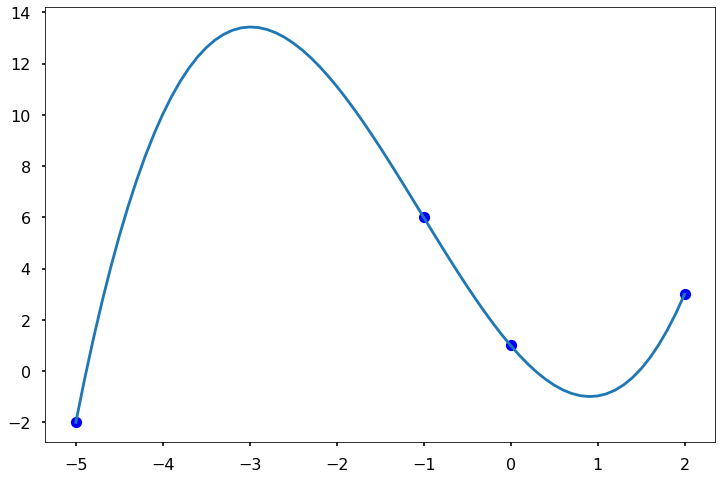

In [26]:
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)